In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import io
%cd "C:\Users\ykkou\Desktop\imarticus\Tutorial Datasets\Flu shot learning"

C:\Users\ykkou\Desktop\imarticus\Tutorial Datasets\Flu shot learning


In [3]:
train_df = pd.read_csv("training_set_features.csv")

In [4]:
train_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [5]:
target_df = pd.read_csv('training_set_labels.csv')

In [6]:
target_df

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [7]:
test_df = pd.read_csv('test_set_features.csv')

In [8]:
test_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [9]:
combine_df = pd.concat([train_df,test_df],axis=0)

In [10]:
combine_df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [11]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53415 non-null  int64  
 1   h1n1_concern                 53238 non-null  float64
 2   h1n1_knowledge               53177 non-null  float64
 3   behavioral_antiviral_meds    53265 non-null  float64
 4   behavioral_avoidance         52994 non-null  float64
 5   behavioral_face_mask         53377 non-null  float64
 6   behavioral_wash_hands        53333 non-null  float64
 7   behavioral_large_gatherings  53256 non-null  float64
 8   behavioral_outside_home      53251 non-null  float64
 9   behavioral_touch_face        53159 non-null  float64
 10  doctor_recc_h1n1             49095 non-null  float64
 11  doctor_recc_seasonal         49095 non-null  float64
 12  chronic_med_condition        51512 non-null  float64
 13  child_under_6_mo

In [12]:
(combine_df.isnull().sum()*100/len(combine_df)).sort_values(ascending=False)

employment_occupation          50.352897
employment_industry            49.808106
health_insurance               45.871010
income_poverty                 16.699429
doctor_recc_h1n1                8.087616
doctor_recc_seasonal            8.087616
rent_or_own                     7.634560
employment_status               5.492839
marital_status                  5.335580
education                       5.268183
chronic_med_condition           3.562670
child_under_6_months            3.057194
health_worker                   2.982308
opinion_seas_sick_from_vacc     1.980717
opinion_seas_risk               1.896471
opinion_seas_vacc_effective     1.711130
opinion_h1n1_vacc_effective     1.477113
opinion_h1n1_sick_from_vacc     1.441543
opinion_h1n1_risk               1.437798
household_children              0.887391
household_adults                0.887391
behavioral_avoidance            0.788168
behavioral_touch_face           0.479266
h1n1_knowledge                  0.445568
h1n1_concern    

In [13]:
combine_df.drop('respondent_id',axis=1,inplace=True)

In [14]:
combine_df.head(10)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp
9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
original = combine_df

In [17]:
mask = combine_df.isnull()

In [18]:
combine_df =combine_df.astype(str).apply(LabelEncoder().fit_transform)

In [19]:
combine_df = combine_df.where(~mask,original)

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

In [21]:
imputer = IterativeImputer(estimator=DecisionTreeClassifier(),initial_strategy='most_frequent',max_iter=20)

In [22]:
combine_df_impute = imputer.fit_transform(combine_df)

C:\Users\ykkou\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\ykkou\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [23]:
combine_df_impute = pd.DataFrame(combine_df_impute,columns=combine_df.columns)

In [24]:
combine_df_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53415 non-null  float64
 1   h1n1_knowledge               53415 non-null  float64
 2   behavioral_antiviral_meds    53415 non-null  float64
 3   behavioral_avoidance         53415 non-null  float64
 4   behavioral_face_mask         53415 non-null  float64
 5   behavioral_wash_hands        53415 non-null  float64
 6   behavioral_large_gatherings  53415 non-null  float64
 7   behavioral_outside_home      53415 non-null  float64
 8   behavioral_touch_face        53415 non-null  float64
 9   doctor_recc_h1n1             53415 non-null  float64
 10  doctor_recc_seasonal         53415 non-null  float64
 11  chronic_med_condition        53415 non-null  float64
 12  child_under_6_months         53415 non-null  float64
 13  health_worker   

In [25]:
combine_df_impute

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,0.0,1.0,8.0,2.0,0.0,0.0,13.0,20.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0,20.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,9.0,0.0,2.0,0.0,15.0,22.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0,21.0,18.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,19.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,19.0,5.0
53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2.0,0.0,1.0,0.0,9.0,2.0,1.0,3.0,4.0,19.0
53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,9.0,0.0,1.0,0.0,8.0,10.0
53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,6.0,7.0


In [26]:
train_df_impute = combine_df_impute.loc[0:26706]
test_df_impute = combine_df_impute.loc[26707:53414]

In [27]:
train_df_impute.shape,test_df_impute.shape

((26707, 35), (26708, 35))

In [28]:
train_df.shape,test_df.shape

((26707, 36), (26708, 36))

<Axes: >

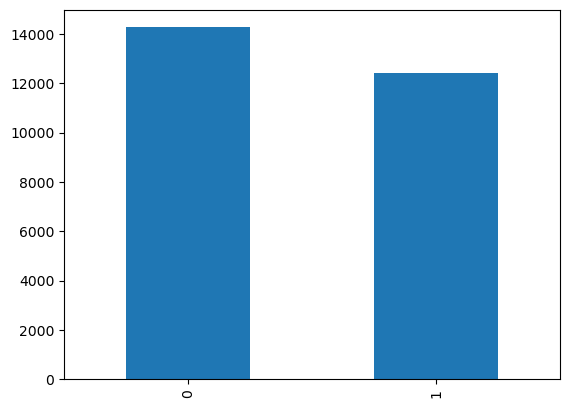

In [32]:
target_df.seasonal_vaccine.value_counts().plot(kind='bar')

<Axes: >

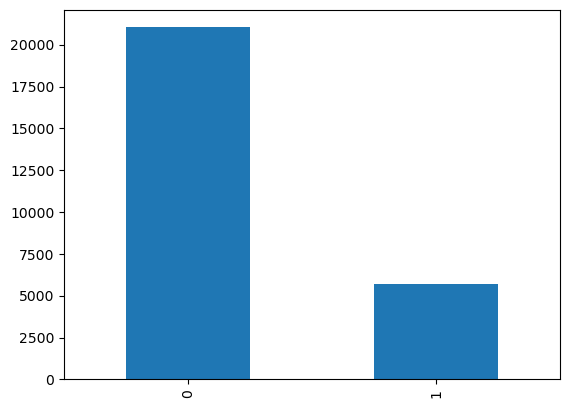

In [33]:
target_df.h1n1_vaccine.value_counts().plot(kind='bar')

In [38]:
y= target_df.h1n1_vaccine
X = train_df_impute

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,RocCurveDisplay

In [40]:
logit = LogisticRegression(max_iter=2000)

In [41]:
logit_model = logit.fit(X,y)

In [42]:
logit_model.score(X,y)

0.8304189912756955

In [43]:
logit_train_pred = logit_model.predict(X)

In [45]:
print(classification_report(y,logit_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     21033
           1       0.67      0.40      0.50      5674

    accuracy                           0.83     26707
   macro avg       0.76      0.67      0.70     26707
weighted avg       0.81      0.83      0.81     26707



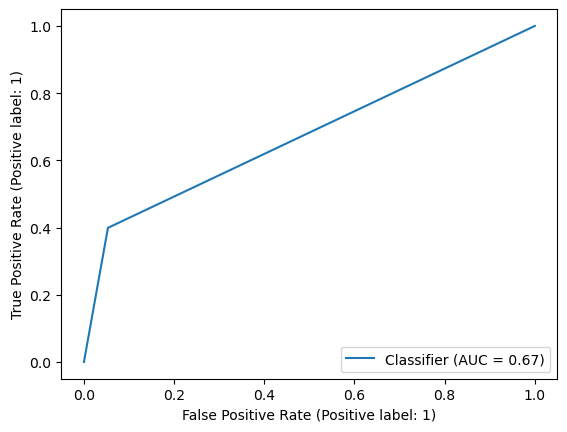

In [47]:
RocCurveDisplay.from_predictions(y,logit_train_pred)

In [48]:
!pip install imblearn

In [61]:
from imblearn.under_sampling import RandomUnderSampler

In [62]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
rus =  RandomUnderSampler(random_state=42)

In [63]:
ros = RandomOverSampler(random_state=42)

In [51]:
X_rus, y_rus = rus.fit_resample(X,y)

In [64]:
X_ros,y_ros = ros.fit_resample(X,y)

In [52]:
print(pd.DataFrame(y).value_counts())

h1n1_vaccine
0               21033
1                5674
dtype: int64


In [53]:
print(pd.DataFrame(y_rus).value_counts())

h1n1_vaccine
0               5674
1               5674
dtype: int64


In [65]:
print(pd.DataFrame(y_ros).value_counts())

h1n1_vaccine
0               21033
1               21033
dtype: int64


In [56]:
logit_rus_model = logit.fit(X_rus,y_rus)

In [66]:
logit_ros_model = logit.fit(X_ros,y_ros)

In [57]:
logit_rus_model.score(X_rus,y_rus)

0.7577546704265069

In [67]:
logit_ros_model.score(X_ros,y_ros)

0.7557409784624162

In [58]:
logit_rus_train_pred = logit_rus_model.predict(X_rus)

In [68]:
logit_ros_train_pred = logit_ros_model.predict(X_ros)

In [59]:
print(classification_report(y_rus,logit_rus_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      5674
           1       0.77      0.73      0.75      5674

    accuracy                           0.76     11348
   macro avg       0.76      0.76      0.76     11348
weighted avg       0.76      0.76      0.76     11348



In [69]:
print(classification_report(y_ros,logit_ros_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     21033
           1       0.77      0.73      0.75     21033

    accuracy                           0.76     42066
   macro avg       0.76      0.76      0.76     42066
weighted avg       0.76      0.76      0.76     42066



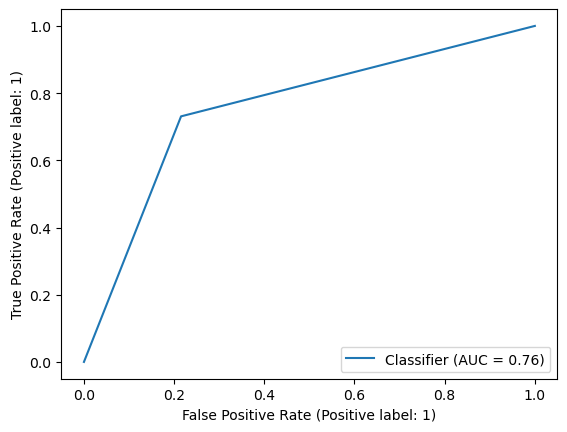

In [60]:
RocCurveDisplay.from_predictions(y_rus,logit_rus_train_pred)

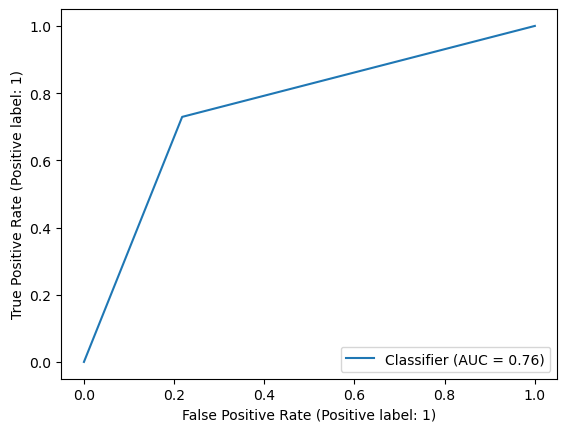

In [70]:
RocCurveDisplay.from_predictions(y_ros,logit_ros_train_pred)

In [ ]:
# Smote - Synthetic Minority Oversampling Technique

# Smote used KNN algorithm ( Euclidean Distance ) and creates artificial or synthetic data that lies within the data range

# No Outliers are created

# Smote also uses random generator for generating random weights between 0 and 1

# Two Independent Variables - X1 - Income and X2 - Age

# X1 = 2400,2500,2700,2300,2100
# X2 = 46,34,45,28,25

# Choose a randomly selected weight between 0 and 1 . Randomly selected 0.60

# 2500 + 0.6(2400-2500) = 2440 ( Synthetic Data Point)
# 34 + 0.6(46-34) = 41.2 or 41 (Synthetic Data Point)

In [72]:
from imblearn.over_sampling import SMOTEN

In [75]:
smote = SMOTEN(random_state=42)

In [76]:
X_smote,y_smote = smote.fit_resample(X,y)

In [78]:
print(pd.DataFrame(y_smote).value_counts())

h1n1_vaccine
0               21033
1               21033
dtype: int64


In [116]:
logit_smote_model = logit.fit(X_smote,y_smote)

In [80]:
logit_smote_model.score(X_smote,y_smote)

0.8118908382066277

In [81]:
logit_smote_train_pred = logit_smote_model.predict(X_smote)

In [82]:
print(classification_report(y_smote,logit_smote_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     21033
           1       0.82      0.80      0.81     21033

    accuracy                           0.81     42066
   macro avg       0.81      0.81      0.81     42066
weighted avg       0.81      0.81      0.81     42066



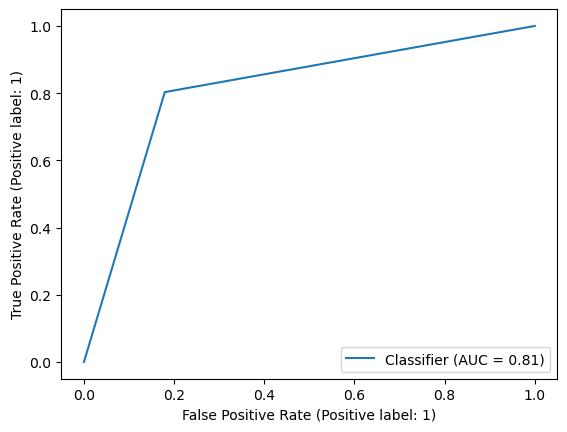

In [84]:
RocCurveDisplay.from_predictions(y_smote,logit_smote_train_pred)

In [85]:
# Undersampling Technique - Tomek Links are pairs of observations of opposite classes in close vicinity
# In this algorithm, majority class observations are deleted from the tomek link, which provides a better decision for a 
# classifier

In [86]:
from imblearn.under_sampling import TomekLinks

In [88]:
tl = TomekLinks(sampling_strategy='majority')

In [89]:
X_tl,y_tl = tl.fit_resample(X,y)

In [90]:
print(pd.DataFrame(y_tl).value_counts())

h1n1_vaccine
0               19761
1                5674
dtype: int64


In [91]:
tl_model = logit.fit(X_tl,y_tl)

In [92]:
tl_model.score(X_tl,y_tl)

0.8318458816591311

In [93]:
tl_model_train_pred = tl_model.predict(X_tl)

In [94]:
print(classification_report(y_tl,tl_model_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90     19761
           1       0.69      0.44      0.54      5674

    accuracy                           0.83     25435
   macro avg       0.77      0.69      0.72     25435
weighted avg       0.82      0.83      0.82     25435



In [95]:
y_seasonal = target_df.seasonal_vaccine

In [96]:
seasonal_model = logit.fit(X,y_seasonal)

In [100]:
seasonal_pred = seasonal_model.predict_proba(test_df_impute)

In [117]:
h1n1_pred = logit_smote_model.predict_proba(test_df_impute)

In [123]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [161]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
rf = RandomForestClassifier(n_estimators=1000,max_depth=12)

In [162]:
dt = DecisionTreeClassifier(max_depth=10)

In [150]:
rf_model = rf.fit(X,y_seasonal)

In [154]:
rf_smote_model = rf.fit(X_smote,y_smote)

In [163]:
dt_model = dt.fit(X,y_seasonal)

In [168]:
dt_smote_model = dt.fit(X_smote,y_smote)

In [164]:
seasonal_pred_dt = dt_model.predict_proba(test_df_impute)

In [169]:
h1n1_pred_dt = dt_smote_model.predict_proba(test_df_impute)

In [165]:
seasonal_pred_dt = pd.DataFrame(seasonal_pred_dt)

In [170]:
h1n1_pred_dt = pd.DataFrame(h1n1_pred_dt)

In [167]:
seasonal_pred_dt

,0,1
0,0.870588,0.129412
1,0.929688,0.070312
2,0.104972,0.895028
3,0.087719,0.912281
4,0.342857,0.657143
...,...,...
26703,0.597156,0.402844
26704,0.804878,0.195122
26705,0.895833,0.104167
26706,0.606061,0.393939


In [171]:
h1n1_pred_dt

,0,1
0,0.903846,0.096154
1,0.520799,0.479201
2,0.598131,0.401869
3,0.059530,0.940470
4,0.961039,0.038961
...,...,...
26703,0.217391,0.782609
26704,0.963415,0.036585
26705,0.939516,0.060484
26706,0.942197,0.057803


In [108]:
submission = pd.read_csv('submission_format.csv')

In [109]:
submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7
...,...,...,...
26703,53410,0.5,0.7
26704,53411,0.5,0.7
26705,53412,0.5,0.7
26706,53413,0.5,0.7


In [172]:
submission.h1n1_vaccine = h1n1_pred_dt[1]
submission.seasonal_vaccine = seasonal_pred_dt[1]

In [173]:
submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.096154,0.129412
1,26708,0.479201,0.070312
2,26709,0.401869,0.895028
3,26710,0.940470,0.912281
4,26711,0.038961,0.657143
...,...,...,...
26703,53410,0.782609,0.402844
26704,53411,0.036585,0.195122
26705,53412,0.060484,0.104167
26706,53413,0.057803,0.393939


In [174]:
submission.to_csv('sub4.csv',index=False)